In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [28]:
train_dir= r"C:\Users\jatt4\Documents\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"
valid_dir= r"C:\Users\jatt4\Documents\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"

In [29]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True, # used for shuffle floder of images
    seed=None,    # used for shuffle of image in floder
    validation_split=None,
    subset=None,
    interpolation="bilinear", # bilinear mean smooth effects
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None
)

Found 70295 files belonging to 38 classes.


In [30]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True, # used for shuffle floder of images
    seed=None,    # used for shuffle of image in floder
    validation_split=None,
    subset=None,
    interpolation="bilinear", # bilinear mean smooth effects
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None
)

Found 17572 files belonging to 38 classes.


In [31]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [32]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 28.5   27.5   33.5 ]
   [ 29.    28.    34.  ]
   [ 30.    29.    35.  ]
   ...
   [167.5  158.5  163.5 ]
   [170.75 161.75 166.75]
   [172.75 163.75 168.75]]

  [[ 28.5   27.5   33.5 ]
   [ 29.    28.    34.  ]
   [ 30.    29.    35.  ]
   ...
   [163.   154.   159.  ]
   [169.   160.   165.  ]
   [175.75 166.75 171.75]]

  [[ 28.5   27.5   33.5 ]
   [ 29.    28.    34.  ]
   [ 30.    29.    35.  ]
   ...
   [178.75 169.75 174.75]
   [176.75 167.75 172.75]
   [163.25 154.25 159.25]]

  ...

  [[169.   160.   165.  ]
   [167.5  158.5  163.5 ]
   [167.25 158.25 163.25]
   ...
   [199.5  194.5  200.5 ]
   [195.75 190.75 196.75]
   [195.25 190.25 196.25]]

  [[161.   152.   157.  ]
   [161.25 152.25 157.25]
   [163.5  154.5  159.5 ]
   ...
   [197.25 192.25 198.25]
   [202.25 197.25 203.25]
   [197.25 192.25 198.25]]

  [[159.5  150.5  155.5 ]
   [161.   152.   157.  ]
   [165.   156.   161.  ]
   ...
   [197.25 192.25 198.25]
   [197.75 192.75 198.75]
   [199.75 194.75 20

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import Flatten

In [42]:
model = Sequential()

In [43]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [44]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [45]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [46]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [47]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [48]:
model.add(Dropout(0.25))

In [49]:
model.add(Flatten())

In [50]:
model.add(Dense(units=1500,activation='relu'))

In [51]:
model.add(Dropout(0.4))

In [52]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

# Compiling and Training Phase

In [54]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1908s 865ms/step - accuracy: 0.4149 - loss: 2.0581 - val_accuracy: 0.8145 - val_loss: 0.5750
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1823s 830ms/step - accuracy: 0.8452 - loss: 0.4882 - val_accuracy: 0.9191 - val_loss: 0.2537
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1825s 831ms/step - accuracy: 0.9092 - loss: 0.2800 - val_accuracy: 0.9302 - val_loss: 0.2117
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1890s 860ms/step - accuracy: 0.9368 - loss: 0.1952 - val_accuracy: 0.9480 - val_loss: 0.1668
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1894s 862ms/step - accuracy: 0.9524 - loss: 0.1445 - val_accuracy: 0.9402 - val_loss: 0.1839
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1867s 850ms/step - accuracy: 0.9640 - loss: 0.1114 - val_accuracy: 0.9496 - val_loss: 0.1738
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1827s 832ms/step - accuracy: 0.9701 - loss: 0.0919 - val_accuracy: 0.9588 - val_loss: 0.1378
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1828s 832ms/s

# model Evaluation

In [64]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 466s 212ms/step - accuracy: 0.9882 - loss: 0.0347


In [67]:
print('train_loss:',train_loss,'train_acc:',train_acc)

train_loss: 0.03109223209321499 train_acc: 0.9894871711730957


In [68]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 118s 214ms/step - accuracy: 0.9661 - loss: 0.1116


In [69]:
print('val_loss:',val_loss,'val_acc:',val_acc)

val_loss: 0.11303575336933136 val_acc: 0.965228796005249


# Saving Model

In [70]:
model.save('trained_plant_disease_model.keras')

In [71]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6159328818321228,
  0.8683405518531799,
  0.918472170829773,
  0.9415605664253235,
  0.9555871486663818,
  0.9672664999961853,
  0.9726154208183289,
  0.9762714505195618,
  0.9785902500152588,
  0.9830998182296753],
 'loss': [1.2995538711547852,
  0.4143139123916626,
  0.2507283389568329,
  0.1784505695104599,
  0.13482867181301117,
  0.10106193274259567,
  0.08386486023664474,
  0.07329384237527847,
  0.06547670066356659,
  0.05296840891242027],
 'val_accuracy': [0.8145344853401184,
  0.9191327095031738,
  0.930229902267456,
  0.9479854106903076,
  0.9402458667755127,
  0.9495788812637329,
  0.9587981104850769,
  0.9617573618888855,
  0.9648303985595703,
  0.965228796005249],
 'val_loss': [0.5750219821929932,
  0.2536553144454956,
  0.21174313127994537,
  0.16675667464733124,
  0.18389225006103516,
  0.17377258837223053,
  0.13782799243927002,
  0.1319214552640915,
  0.11338228732347488,
  0.1130359098315239]}

In [72]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [73]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [75]:
training_history.history['accuracy']

[0.6159328818321228,
 0.8683405518531799,
 0.918472170829773,
 0.9415605664253235,
 0.9555871486663818,
 0.9672664999961853,
 0.9726154208183289,
 0.9762714505195618,
 0.9785902500152588,
 0.9830998182296753]

In [76]:
training_history.history['val_accuracy']

[0.8145344853401184,
 0.9191327095031738,
 0.930229902267456,
 0.9479854106903076,
 0.9402458667755127,
 0.9495788812637329,
 0.9587981104850769,
 0.9617573618888855,
 0.9648303985595703,
 0.965228796005249]

Accuracy Visualization

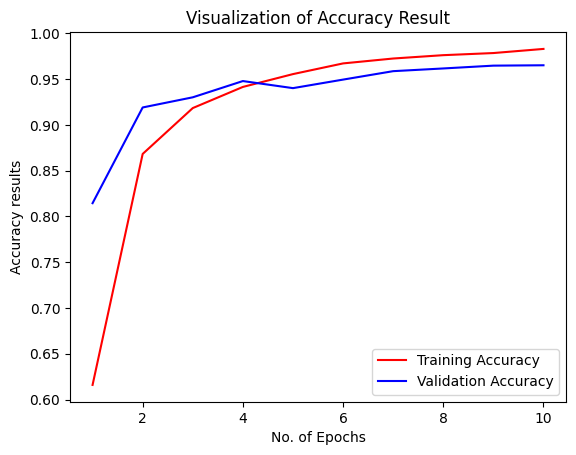

In [77]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy results')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Some other metrics for model evaluation

In [79]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [80]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [94]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

550/550 ━━━━━━━━━━━━━━━━━━━━ 123s 223ms/step


In [103]:
true_categories = tf.concat([y for _, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1) if len(true_categories.shape) == 2 else true_categories
print("Shape of true_categories:", true_categories.shape, "Y_true:", Y_true.numpy())

Shape of true_categories: (17572,) Y_true: [ 0  0  0 ... 37 37 37]


In [104]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [105]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [106]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.97      0.95       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.94      0.95      0.95       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.94      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.88      0.91       410
                       Corn_(maize)___Common_rust_       0.96      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

# Confusion Matrix Visualization

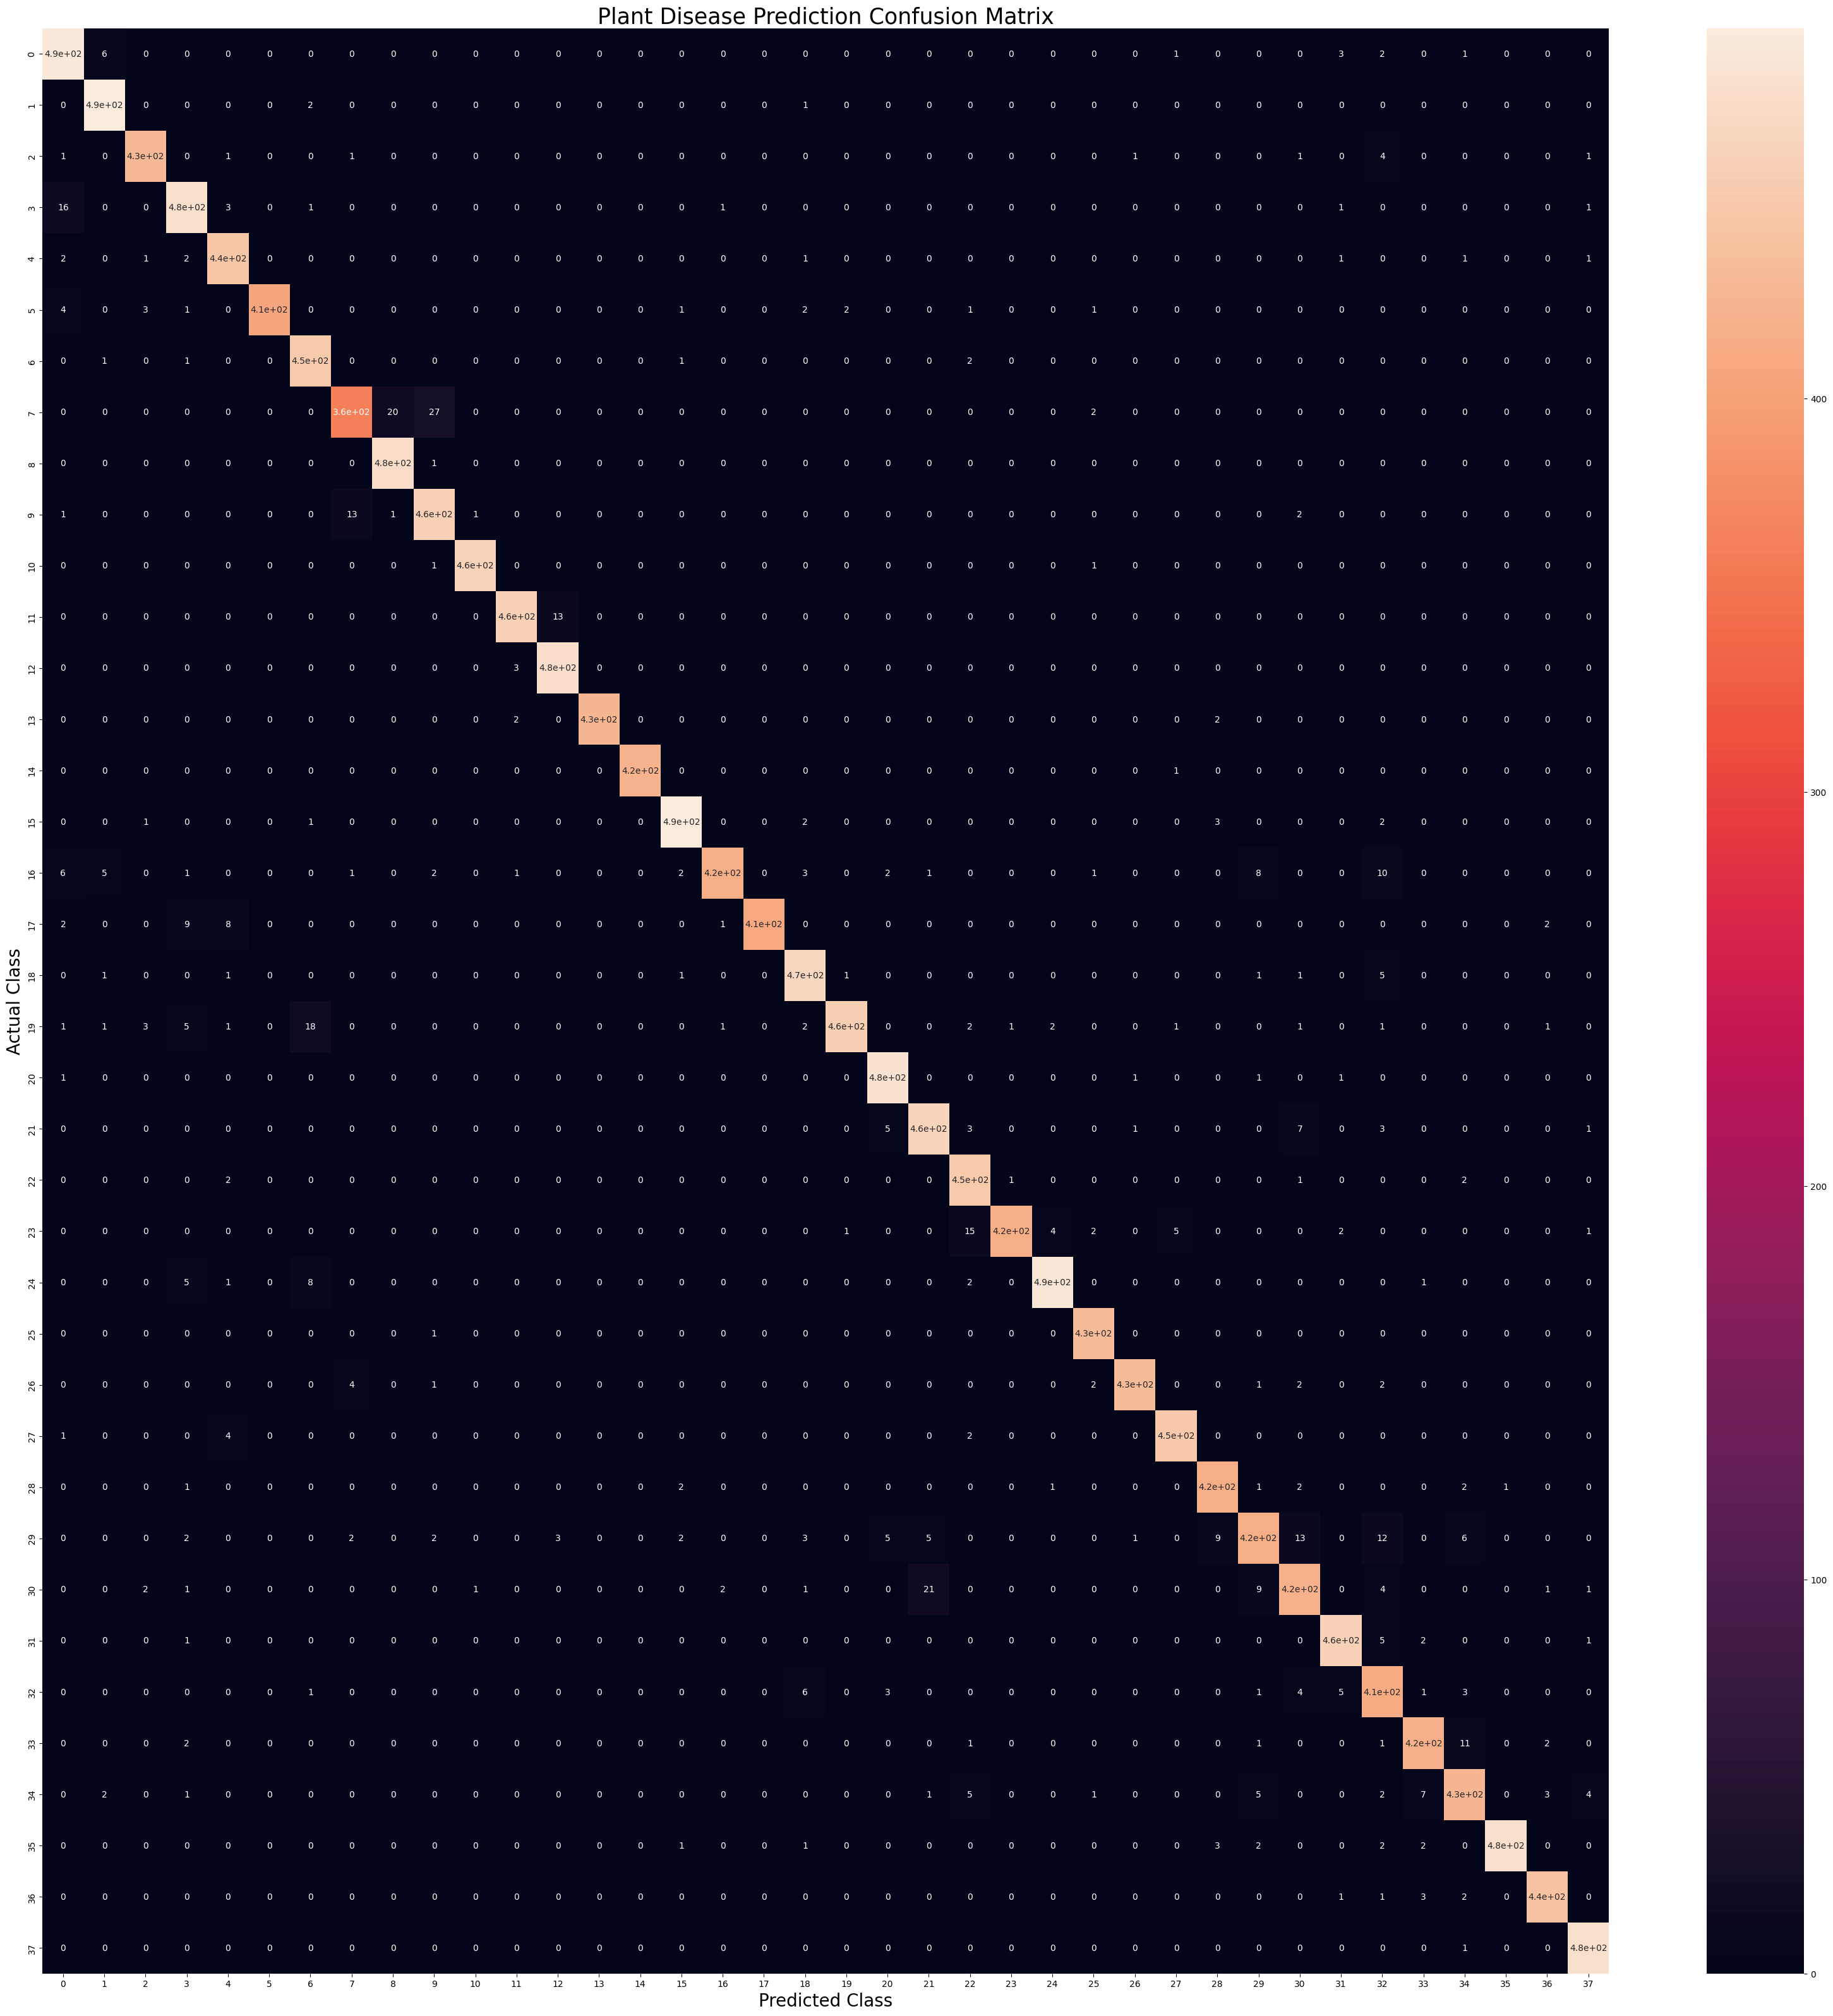

In [107]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()